In [44]:
# Import all the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
data = pd.read_excel("Data/1965-2013/Rainfall.xlsx",sheet_name='all')
data.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bang,lade,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Daily,tot,al,Rain,fall,da,ta,in,Mill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Station,Year,Mo,1,2,3,4,5,6,7,...,22,23,24,25,26,27,28,29,30,31
8,Dhaka,1963,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Dhaka,1963,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [3]:
# Delete First 7 Unnecessary rows
data = data.drop(labels=[i for i in range(0,7)], axis=0)
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
7,Station,Year,Mo,1,2,3,4,5,6,7,...,22,23,24,25,26,27,28,29,30,31
8,Dhaka,1963,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Dhaka,1963,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
10,Dhaka,1963,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
11,Dhaka,1963,4,0,0,1,0,0,2,0,...,13,0,0,0,0,0,0,0,25,NaN


In [4]:
#Resetting the index of the data
data = data.reset_index()
data.head(5)

,index,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,7,Station,Year,Mo,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
1,8,Dhaka,1963,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,Dhaka,1963,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3,10,Dhaka,1963,3,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,11,Dhaka,1963,4,0,0,1,0,0,2,...,13,0,0,0,0,0,0,0,25,NaN


In [5]:
# Deleting the previous index column
data = data.drop(labels='index',axis=1)
data.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,Station,Year,Mo,1,2,3,4,5,6,7,...,22,23,24,25,26,27,28,29,30,31
1,Dhaka,1963,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Dhaka,1963,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3,Dhaka,1963,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Dhaka,1963,4,0,0,1,0,0,2,0,...,13,0,0,0,0,0,0,0,25,NaN


In [6]:
# Setting the index of the dataframe to the first row
df = data.rename(columns=data.iloc[0]).drop(labels=0,axis=0)
df.head(5)
#Now the data is in good condition human readable format

,Station,Year,Mo,1,2,3,4,5,6,7,...,22,23,24,25,26,27,28,29,30,31
1,Dhaka,1963,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Dhaka,1963,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3,Dhaka,1963,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Dhaka,1963,4,0,0,1,0,0,2,0,...,13,0,0,0,0,0,0,0,25,NaN
5,Dhaka,1963,5,0,47,29,0,17,0,3,...,3,0,0,0,0,0,0,25,2,22


In [7]:
# Renaming Column Mo to Month
df.rename(columns = {'Mo':'Month'}, inplace = True)
df.head(5)

,Station,Year,Month,1,2,3,4,5,6,7,...,22,23,24,25,26,27,28,29,30,31
1,Dhaka,1963,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Dhaka,1963,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3,Dhaka,1963,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Dhaka,1963,4,0,0,1,0,0,2,0,...,13,0,0,0,0,0,0,0,25,NaN
5,Dhaka,1963,5,0,47,29,0,17,0,3,...,3,0,0,0,0,0,0,25,2,22


In [8]:
df.shape

(18076, 34)

In [9]:
# Function to show unique items in a column with a certain name to print info
def unique_items(df,column,unique_item_name):
    district = df[column].unique()
    num_of_district = district.size
    print('Total number of '+unique_item_name+': ' + str(num_of_district))
    print(district)

In [10]:
unique_items(df,'Station','Areas')

Total number of Areas: 37
['Dhaka' nan 'Station' 'Tangail' 'Mymensin' 'Faridpur' 'Madaripu'
 'Srimanga' 'Sylhet' 'Bogra' 'Rajshahi' 'Ishurdi' 'Dinajpur' 'Rangpur'
 'sydpur' 'chuadang' 'Jessore' 'Khulna' 'Mongla' 'Satkhira' 'Barisal'
 'Bhola' 'Khepupar' 'Patuakha' 'Chandpur' 'Teknaf' 'Chittago' 'Comilla'
 "Cox's Ba" 'Feni' 'Hatiya' 'Kutubdia' 'M.court' 'Rangamat' 'Sandwip'
 'Ambagan(' 'Sitakund']


In [11]:
# Deleting df['Station']='Station' datas from the df
df = df[df.Station != 'Station']

# Deleting nan values of df['Station']
df = df[df.Station.notna()]
unique_items(df,'Station','District')
df.head(5)

Total number of District: 35
['Dhaka' 'Tangail' 'Mymensin' 'Faridpur' 'Madaripu' 'Srimanga' 'Sylhet'
 'Bogra' 'Rajshahi' 'Ishurdi' 'Dinajpur' 'Rangpur' 'sydpur' 'chuadang'
 'Jessore' 'Khulna' 'Mongla' 'Satkhira' 'Barisal' 'Bhola' 'Khepupar'
 'Patuakha' 'Chandpur' 'Teknaf' 'Chittago' 'Comilla' "Cox's Ba" 'Feni'
 'Hatiya' 'Kutubdia' 'M.court' 'Rangamat' 'Sandwip' 'Ambagan(' 'Sitakund']


,Station,Year,Month,1,2,3,4,5,6,7,...,22,23,24,25,26,27,28,29,30,31
1,Dhaka,1963,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Dhaka,1963,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3,Dhaka,1963,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Dhaka,1963,4,0,0,1,0,0,2,0,...,13,0,0,0,0,0,0,0,25,NaN
5,Dhaka,1963,5,0,47,29,0,17,0,3,...,3,0,0,0,0,0,0,25,2,22


In [12]:
df.shape

(17940, 34)

In [13]:
unique_items(df,'Month','Months')
unique_items(df,'Year','Years')

Total number of Months: 12
[1 2 3 4 5 6 7 8 9 10 11 12]
Total number of Years: 429
[1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 'gh   1963' 'gh   1964'
 'gh   1965' 'gh   1966' 'gh   1967' 'gh   1968' 'gh   1969' 'gh   1970'
 'gh   1971' 'gh   1972' 'gh   1973' 'gh   1974' 'gh   1975' 'gh   1976'
 'gh   1977' 'gh   1978' 'gh   1979' 'gh   1980' 'gh   1981' 'gh   1982'
 'gh   1983' 'gh   1984' 'gh   1985' 'gh   1986' 'gh   1987' 'gh   1988'
 'gh   1989' 'gh   1990' 'gh   1991' 'gh   1992' 'gh   1993' 'gh   1994'
 'gh   1995' 'gh   1996' 'gh   1997' 'gh   1998' 'gh   1999' 'gh   2000'
 'gh   2001' 'gh   2002' 'gh   2003' 'gh   2004' 'gh   2005' 'gh   2006'
 'gh   2007' 'gh   2008' 'gh   2009' 'gh   2010' 'gh   2011' 'gh   2012'
 'gh   2013' 1974 'r    1977' 'r    1978' 'r    1980' '

In [14]:
print(df['Year'].size)

df['Year'] = df['Year'].map(lambda x:int(x[-4:]) if (type(x) == str) else int(x))
print(df['Year'].size)
unique_items(df,'Year','Years')

17940
17940
Total number of Years: 51
[1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 1974]


In [15]:
df.shape

(17940, 34)

In [16]:
df2 = df.copy()
unique_items(df2,'Station','Areas')

Total number of Areas: 35
['Dhaka' 'Tangail' 'Mymensin' 'Faridpur' 'Madaripu' 'Srimanga' 'Sylhet'
 'Bogra' 'Rajshahi' 'Ishurdi' 'Dinajpur' 'Rangpur' 'sydpur' 'chuadang'
 'Jessore' 'Khulna' 'Mongla' 'Satkhira' 'Barisal' 'Bhola' 'Khepupar'
 'Patuakha' 'Chandpur' 'Teknaf' 'Chittago' 'Comilla' "Cox's Ba" 'Feni'
 'Hatiya' 'Kutubdia' 'M.court' 'Rangamat' 'Sandwip' 'Ambagan(' 'Sitakund']


In [17]:
# Fixing the typo of the names of the areas

df2.loc[df2["Station"] == "Mymensin", "Station"] = "Mymensingh"
df2.loc[df2["Station"] == "Madaripu", "Station"] = "Madaripur"
df2.loc[df2["Station"] == "Srimanga", "Station"] = "Srimangal"
df2.loc[df2["Station"] == "sydpur", "Station"] = "Syedpur"
df2.loc[df2["Station"] == "chuadang", "Station"] = "Chuadanga"
df2.loc[df2["Station"] == "Khepupar", "Station"] = "Khepupara"
df2.loc[df2["Station"] == "Patuakha", "Station"] = "Patuakhali"
df2.loc[df2["Station"] == "Chittago", "Station"] = "Chittagong"
df2.loc[df2["Station"] == "Cox's Ba", "Station"] = "Cox's Bazar"
df2.loc[df2["Station"] == "Rangamat", "Station"] = "Rangamati"
df2.loc[df2["Station"] == "Sitakund", "Station"] = "Sitakunda"
df2.loc[df2["Station"] == "Ambagan(", "Station"] = "Ambagan(Ctg)"

In [18]:
unique_items(df2,'Station','Areas')

Total number of Areas: 35
['Dhaka' 'Tangail' 'Mymensingh' 'Faridpur' 'Madaripur' 'Srimangal'
 'Sylhet' 'Bogra' 'Rajshahi' 'Ishurdi' 'Dinajpur' 'Rangpur' 'Syedpur'
 'Chuadanga' 'Jessore' 'Khulna' 'Mongla' 'Satkhira' 'Barisal' 'Bhola'
 'Khepupara' 'Patuakhali' 'Chandpur' 'Teknaf' 'Chittagong' 'Comilla'
 "Cox's Bazar" 'Feni' 'Hatiya' 'Kutubdia' 'M.court' 'Rangamati' 'Sandwip'
 'Ambagan(Ctg)' 'Sitakunda']


In [19]:
df2.head()

,Station,Year,Month,1,2,3,4,5,6,7,...,22,23,24,25,26,27,28,29,30,31
1,Dhaka,1963,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Dhaka,1963,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3,Dhaka,1963,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Dhaka,1963,4,0,0,1,0,0,2,0,...,13,0,0,0,0,0,0,0,25,NaN
5,Dhaka,1963,5,0,47,29,0,17,0,3,...,3,0,0,0,0,0,0,25,2,22


In [20]:
df_predict = df2.melt(id_vars=["Station", "Year","Month"], 
        var_name="Date", 
        value_name="Rainfall_Value")

In [21]:
df_predict = df_predict.dropna()
df_predict = df_predict.sort_values(by=['Year', 'Month','Station'])

In [22]:
df_predict = df_predict.reset_index(drop=True)

In [23]:
df_predict.drop(df_predict.index[df_predict['Rainfall_Value'] == '***'], inplace=True)

In [24]:
df2 = df_predict.copy()
df2.head()

,Station,Year,Month,Date,Rainfall_Value
0,Barisal,1963,1,1,0
1,Barisal,1963,1,2,0
2,Barisal,1963,1,3,0
3,Barisal,1963,1,4,0
4,Barisal,1963,1,5,0


In [25]:
altitude_data = pd.read_excel("Data/Book.xlsx")
altitude_data = altitude_data.dropna()
altitude_data.rename(columns = {'Districts':'Station'}, inplace = True)

In [26]:
# No altitude data for M.Court. So dropping that station
df2 = df2[df2['Station']!='M.court']
df = df[df['Station']!='M.court']

In [27]:
unique_items(df2,'Station','Areas')
# Now M.Court is not anymore in the dataset

Total number of Areas: 34
['Barisal' 'Bogra' 'Chittagong' "Cox's Bazar" 'Dhaka' 'Dinajpur'
 'Faridpur' 'Ishurdi' 'Jessore' 'Khulna' 'Mymensingh' 'Rangamati'
 'Rangpur' 'Satkhira' 'Srimangal' 'Sylhet' 'Chandpur' 'Comilla' 'Rajshahi'
 'Bhola' 'Hatiya' 'Sandwip' 'Patuakhali' 'Feni' 'Khepupara' 'Kutubdia'
 'Madaripur' 'Teknaf' 'Sitakunda' 'Tangail' 'Chuadanga' 'Mongla' 'Syedpur'
 'Ambagan(Ctg)']


In [28]:
altitude_data

,Station,Latitude,Longitude,Altitude(m)
0,Ambagan(Ctg),22.350000,91.817000,34.00
1,Barisal,22.704970,90.370130,1.20
2,Bhola,22.687590,90.644030,1.80
3,Bogra,24.850980,89.371080,20.00
4,Chandpur,23.232100,90.663078,12.00
5,Chittagong,22.338400,91.831680,29.00
6,Chuadanga,23.663390,88.950590,14.00
7,Cox's Bazar,21.439730,92.009550,10.00
8,Comilla,23.461860,91.185030,15.00
9,Dhaka,23.710400,90.407440,4.00


In [29]:
altitude_data[altitude_data['Station']=='Barisal']

,Station,Latitude,Longitude,Altitude(m)
1,Barisal,22.70497,90.37013,1.2


In [30]:
df = pd.merge(df2, altitude_data, on="Station",how='left')

In [31]:
df['Rainfall_Value'] = pd.to_numeric(df['Rainfall_Value'])

In [32]:
df['Rainfall_Value'].dtype

dtype('int64')

In [61]:
X_cols = [
    'Year',
    'Month',
     'Date',
    'Latitude',
    'Longitude',
    'Altitude(m)'
]
y_col = ['Rainfall_Value']
X = df[X_cols]
y = df[y_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train_Test_Split

# poly = PolynomialFeatures(3)
# X = poly.fit_transform(X)


# rf = RandomForestRegressor(n_estimators = 100, max_depth=10, n_jobs=1)
# rf.fit(X_train, y_train.values.ravel())
# y_pred = rf.predict(X_test)
# print(mean_absolute_error(y_test, y_pred))
# print(rf.score(X_test, y_test))

In [57]:
# Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
# Establish model
model = RandomForestRegressor(n_jobs=-1)

C:\Users\dstus\AppData\Local\Temp\ipykernel_12876\2513159631.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\dstus\AppData\Local\Temp\ipykernel_12876\2513159631.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\dstus\AppData\Local\Temp\ipykernel_12876\2513159631.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\dstus\AppData\Local\Temp\ipykernel_12876\2513159631.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y

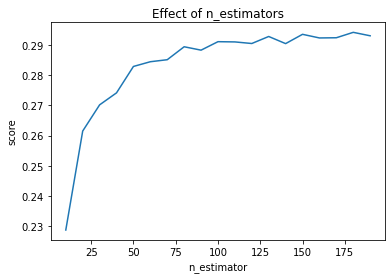

In [50]:
# Try different numbers of n_estimators - this will take time or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train.values.ravel())
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [51]:
scores

[0.22874178304117254,
 0.26150881190979436,
 0.2701818206121952,
 0.27415683914154443,
 0.2828956613804591,
 0.2844618905921288,
 0.28513022660807485,
 0.28941665195066246,
 0.28829464246039227,
 0.29110019563468814,
 0.2910214756418399,
 0.29049569000478825,
 0.2928204626932709,
 0.29046032782781217,
 0.2935373198490051,
 0.29233614565320887,
 0.2924012081198212,
 0.2941940497839254,
 0.29305193782732786]

In [ ]:
X_train, X_test, y_train, y_test

In [59]:
print(mean_absolute_error(y_test, y_pred))
print(rf.score(X_test, y_test))

7.834911343436414
0.1563890509168382


In [64]:
from sklearn import metrics
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

#Predicting using test set 
y_pred_lr = lin_reg.predict(X_test)

#Mutiple Linear Regression Accuracy with test set
accuracy_lf = metrics.r2_score(y_test, y_pred_lr)
print('Mutiple Linear Regression Accuracy: ', accuracy_lf)

#Predicting the SalePrice using cross validation (KFold method)
y_pred_kf_lr = cross_val_predict(lin_reg, X, y, cv=10 )

#Mutiple Linear Regression Accuracy with cross validation (KFold method)
accuracy_lf = metrics.r2_score(y, y_pred_kf_lr)
print('Cross-Predicted(KFold) Mutiple Linear Regression Accuracy: ', accuracy_lf)

Mutiple Linear Regression Accuracy:  0.009920036728617188
Cross-Predicted(KFold) Mutiple Linear Regression Accuracy:  0.009458758934723699


In [65]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
lin_reg_pl = LinearRegression()

#Predicting the SalePrice using cross validation (KFold method)
y_pred_pl = cross_val_predict(lin_reg_pl, X_poly, y, cv=10 )
#Polynominal Regression Accuracy with cross validation
accuracy_pl = metrics.r2_score(y, y_pred_pl)
print('Cross-Predicted(KFold) Polynominal Regression Accuracy: ', accuracy_pl)

Cross-Predicted(KFold) Polynominal Regression Accuracy:  0.08316093949850889


In [67]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X_train,y_train)

#Predicting the SalePrices using test set 
y_pred_dt = dt_regressor.predict(X_test)

#Decision Tree Regression Accuracy with test set
print('Decision Tree Regression Accuracy: ', dt_regressor.score(X_test,y_test))

#Predicting the SalePrice using cross validation (KFold method)
y_pred_dt = cross_val_predict(dt_regressor, X, y, cv=10 )
#Decision Tree Regression Accuracy with cross validation
accuracy_dt = metrics.r2_score(y, y_pred_dt)
print('Cross-Predicted(KFold) Decision Tree Regression Accuracy: ', accuracy_dt)

Decision Tree Regression Accuracy:  -0.2856123537542108
Cross-Predicted(KFold) Decision Tree Regression Accuracy:  -0.7971541231940253


In [68]:
rf_regressor = RandomForestRegressor(n_estimators = 300 ,  random_state = 0)
rf_regressor.fit(X_train,y_train)

#Predicting the SalePrices using test set 
y_pred_rf = rf_regressor.predict(X_test)

#Random Forest Regression Accuracy with test set
print('Random Forest Regression Accuracy: ', rf_regressor.score(X_test,y_test))

#Predicting the SalePrice using cross validation (KFold method)
y_pred_rf = cross_val_predict(rf_regressor, X, y, cv=10 )

#Random Forest Regression Accuracy with cross validation
accuracy_rf = metrics.r2_score(y, y_pred_rf)
print('Cross-Predicted(KFold) Random Forest Regression Accuracy: ', accuracy_rf)

C:\Users\dstus\AppData\Local\Temp\ipykernel_12876\1005003328.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train,y_train)


Random Forest Regression Accuracy:  0.29227835701240135


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1044: DataConversionWarning: A column-vector 

Cross-Predicted(KFold) Random Forest Regression Accuracy:  -0.40733591462437513


In [69]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

#Predicting the SalePrices using test set 
y_pred_lr = lin_reg.predict(X_test)

#Mutiple Linear Regression Accuracy with test set
accuracy_lf = metrics.r2_score(y_test, y_pred_lr)
print('Mutiple Linear Regression Accuracy: ', accuracy_lf)

#Predicting the SalePrice using cross validation (KFold method)
y_pred_kf_lr = cross_val_predict(lin_reg, X, y, cv=10 )

#Mutiple Linear Regression Accuracy with cross validation (KFold method)
accuracy_lf = metrics.r2_score(y, y_pred_kf_lr)
print('Cross-Predicted(KFold) Mutiple Linear Regression Accuracy: ', accuracy_lf)

Mutiple Linear Regression Accuracy:  0.009920036728617188
Cross-Predicted(KFold) Mutiple Linear Regression Accuracy:  0.009458758934723699
